# <p style="padding:10px;background-color:#232323;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Predicting Gas Production using Machine Learning Techniques</p>

### Content

1. Data Collection and Preprocessing
    * Production data
    * Data Summary
    * Data Cleaning 
    * Univariate and Bivariate Analysis for outlier detection
    * Handling of NAN (missing) values with imputation
2. Exploratory Data Analysis 
    * Statistical Summary
    * Understanding the Datasets
3. Feature Engineering
    * Extraction of relevant production data
    * Feature extraction using PCA
    * Feature Scaling
4. Model Development and Optimization
    * Linear Regression
    * Random Forest Regression
    * XGBoost Regression
    * Time series forecasting (LSTM)
    * Polynomial Regression
5. Results and Conclusions
    

# 1. Data collection and preprocessing

In [ ]:
# Import some relevant libraries to begin exploratory analysis of the dataset
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import math
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None) #to see all available columns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Well production analysis data.csv to Well production analysis data.csv


In [ ]:
#import raw data
rawdata = pd.read_csv("Well production analysis data.csv")
print(rawdata.shape)
print(rawdata.columns)
rawdata.head()

(15634, 16)
Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND'],
      dtype='object')


,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production


**Statistical description**

In [ ]:
rawdata.describe().T.sort_values(by='count', ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='red')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,15349.000000,19.994172,8.369911,0.000000,24.000000,24.000000,24.000000,25.000000
DP_CHOKE_SIZE,15340.000000,11.441063,19.816930,0.000000,0.000000,2.385000,13.765250,125.719000
BORE_OIL_VOL,9161.000000,1095.638031,1323.541545,0.000000,191.000000,558.000000,1345.000000,5902.000000
BORE_GAS_VOL,9161.000000,161049.063094,188136.409296,0.000000,29431.000000,87750.000000,202482.000000,851132.000000
BORE_WAT_VOL,9161.000000,1672.152931,1706.980951,-458.000000,20.000000,1098.000000,3261.000000,8020.000000
AVG_WHP_P,9155.000000,45.377815,24.752635,0.000000,31.148000,37.934000,57.101500,137.311000
AVG_WHT_P,9146.000000,67.728440,27.719030,0.000000,56.577750,80.071500,88.062000,93.510000
AVG_DOWNHOLE_PRESSURE,8980.000000,181.803870,109.712365,0.000000,0.000000,232.897000,255.401250,397.589000
AVG_DOWNHOLE_TEMPERATURE,8980.000000,77.162970,45.657949,0.000000,0.000000,103.186500,106.277000,108.502000
AVG_DP_TUBING,8980.000000,154.028791,76.752381,0.000000,83.665000,175.589000,204.320000,345.907000


**Description of Variables**

ON_STREAM_HRS: It refers to the number of hours that a production well 
was operating and producing oil or gas during a given time period.


DP_CHOKE_SIZE: This is the differential pressure (DP) across the choke during production. It is a function of the size of the choke used. Monitoring the differential pressure across the choke is important as it can provide valuable information about the flow of fluids through the wellbore and the performance of the choke.


BORE_OIL_VOL: This is the volume of oil produced at a given time.


BORE_GAS_VOL: This refers to the volume of gas produced at a given time.

BORE_WAT_VOL: This is the volumme of water produced from a well at a given time.

AVG_WHP_P: This refers to the average wellhead pressure during production operations. Monitoring the wellhead pressure is important as it can provide valuable information about the flow of fluids in and out of the wellbore, and can indicate the presence of any problems or issues.

AVG_WHT_P: This refers to the average wellhead temperature during production. Again, monitoring the wellhead temperature is important as it can provide information about the flow of fluids in and out of the wellbore, and can indicate the presence of any problems or issues.

AVG_DOWNHOLE_PRESSURE: Refers to the average pressure measured within the wellbore at a certain depth during production. This variable is important because it provides information about the pressure conditions within the wellbore, which can impact the flow of fluids and the productivity of the well. Understanding the average downhole pressure can help operators to make informed decisions about how to optimize well performance and production rates.

AVG_DOWNHOLE_TEMPERATURE: Refers to the average temperature measured within the wellbore at a certain depth during production. It is important because it provides information about the temperature conditions within the wellbore, which can impact the flow of fluids and the productivity of the well.

AVG_DP_TUBING: Refers to the average flow rate of fluid through the tubing in the well. 

AVG_CHOKE_SIZE: It is the average size of the choke used to regulate the flow of fluids through the wellbore.

AVG_ANNULUS_PRESSURE: Refers to the average pressure measured in the annular space between the tubing and the casing in a well.









**Data Cleaning**

<Axes: >

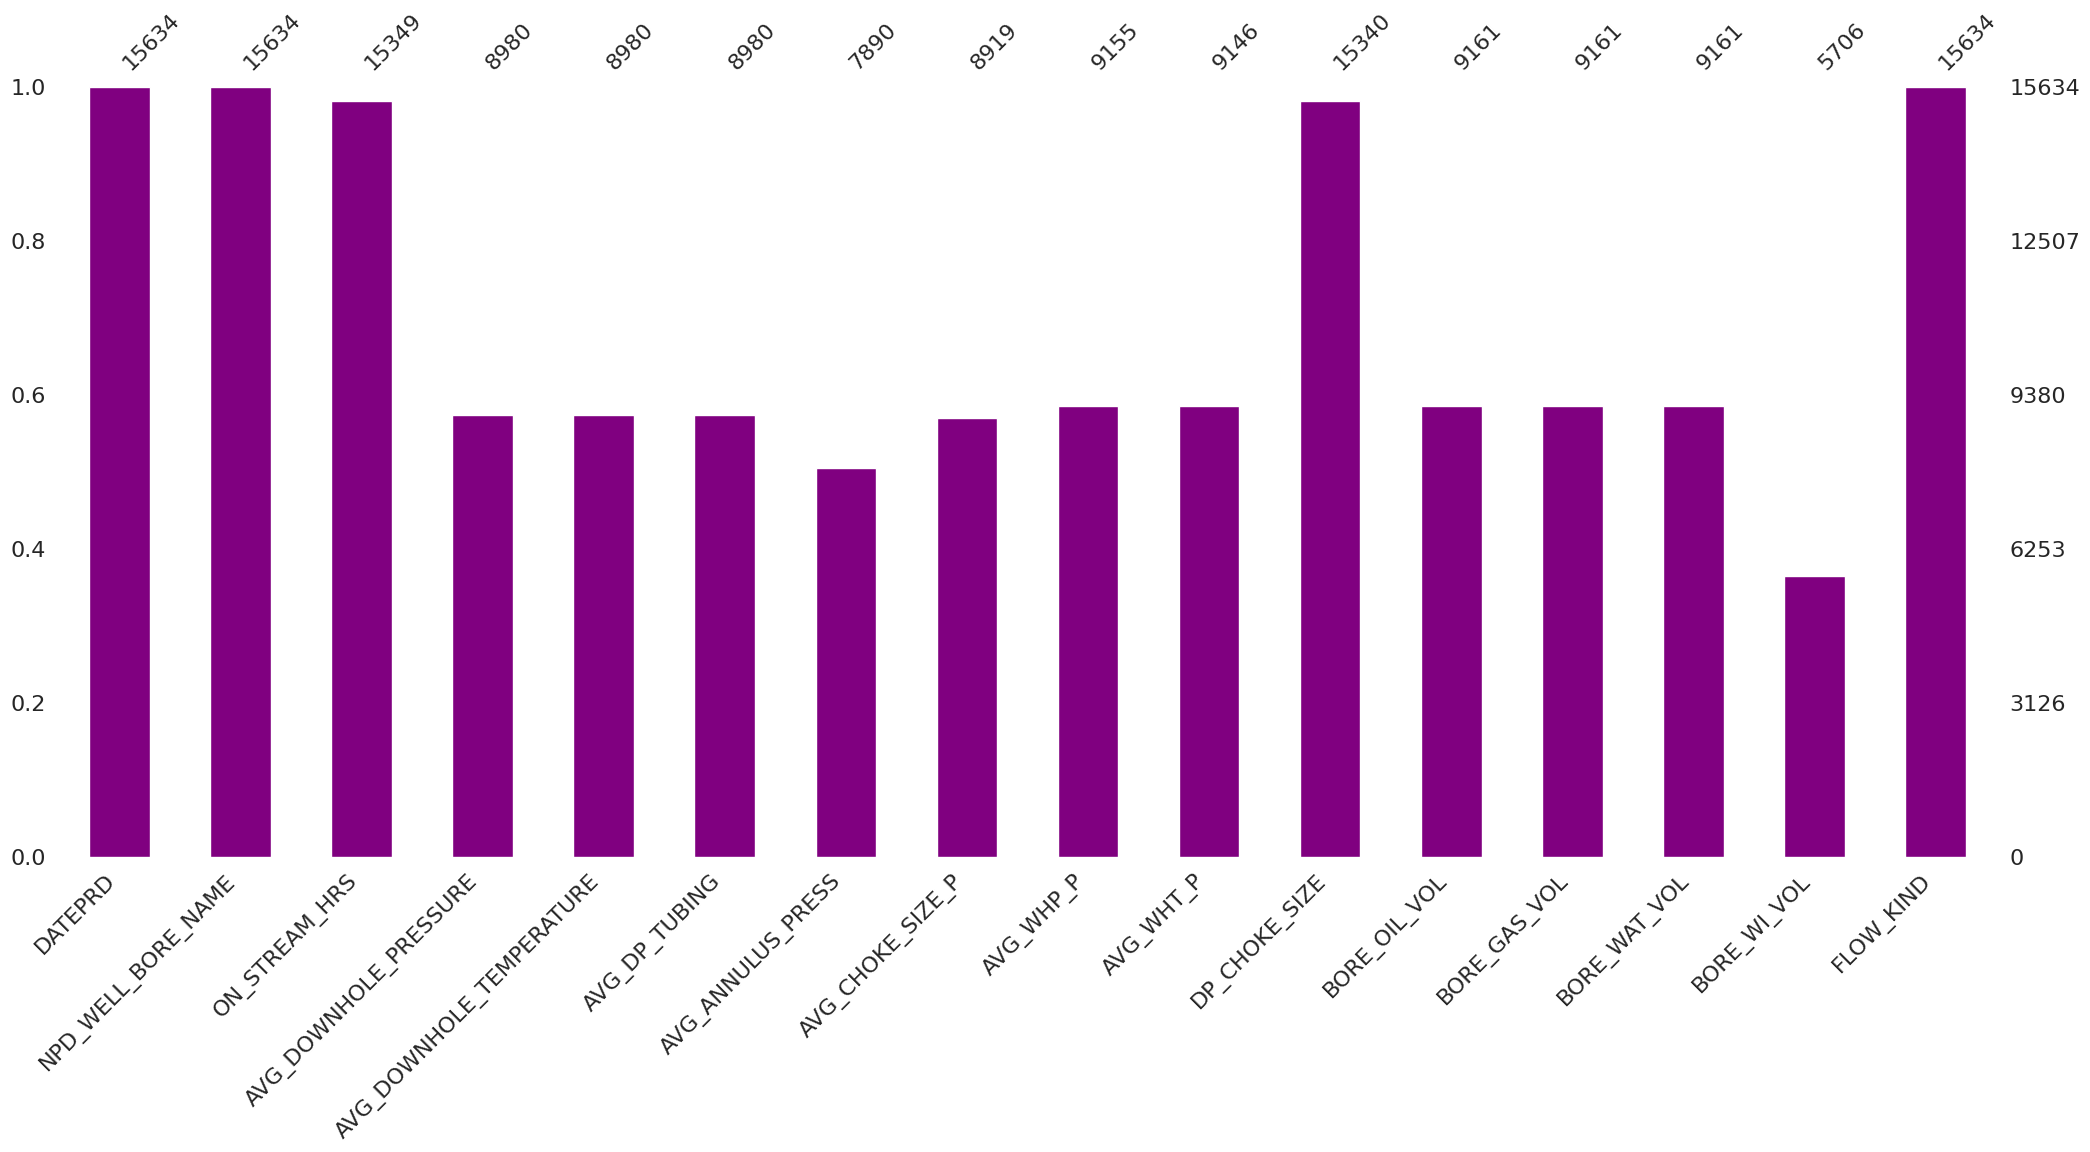

In [ ]:
# Visualize the missing values using msno bar
import missingno as msno
sns.set(style='ticks')
msno.bar(rawdata, color="purple")

In [ ]:
# check for missing values 
rawdata.isnull().sum()

DATEPRD                        0
NPD_WELL_BORE_NAME             0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
dtype: int64

In [ ]:
# Determine the percentage of missing variables
total = rawdata.isnull().sum().sort_values(ascending=False)
percent = (rawdata.isnull().sum()/rawdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
BORE_WI_VOL,9928,0.635026
AVG_ANNULUS_PRESS,7744,0.495331
AVG_CHOKE_SIZE_P,6715,0.429513
AVG_DOWNHOLE_PRESSURE,6654,0.425611
AVG_DOWNHOLE_TEMPERATURE,6654,0.425611
AVG_DP_TUBING,6654,0.425611
AVG_WHT_P,6488,0.414993
AVG_WHP_P,6479,0.414417
BORE_OIL_VOL,6473,0.414034
BORE_GAS_VOL,6473,0.414034


**Check the count of missing values in the production data according to wells.**

In [ ]:
rawdata['NPD_WELL_BORE_NAME'].value_counts()

15/9-F-4       3327
15/9-F-5       3306
15/9-F-12      3056
15/9-F-14      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: NPD_WELL_BORE_NAME, dtype: int64

**Handling missing data by Imputation.**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create an ordinal encoder object
encoder = OrdinalEncoder()

# Encode selected columns
columns_to_encode = ['DATEPRD', 'NPD_WELL_BORE_NAME', 'FLOW_KIND']
encoded_data = encoder.fit_transform(rawdata[columns_to_encode])

# Replace original columns with encoded values
for i, col in enumerate(columns_to_encode):
    rawdata[col] = encoded_data[:, i]
    
# Check the encoded data
rawdata.head(5)


,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,668.0,0.0,0.0,0.000,0.000,0.000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,NaN,1.0
1,778.0,0.0,0.0,NaN,NaN,NaN,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,NaN,1.0
2,887.0,0.0,0.0,NaN,NaN,NaN,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,NaN,1.0
3,996.0,0.0,0.0,NaN,NaN,NaN,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,NaN,1.0
4,1105.0,0.0,0.0,310.376,96.876,277.278,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,NaN,1.0


In [ ]:
from sklearn.impute import KNNImputer

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in your data
imputed_data = imputer.fit_transform(rawdata)

# Replace missing values in the original data with imputed values
rawdata.iloc[:, :] = imputed_data

In [ ]:
# Transform the encoded data back to string data
rawdata[columns_to_encode] = encoder.inverse_transform(encoded_data)

# Check the transformed data
rawdata.head(5)

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.0000,0.0000,0.0000,0.0,0.00000,0.000,0.00,0.000,0.0,0.0,0.0,0.0,production
1,08-Apr-14,15/9-F-1 C,0.0,245.8432,76.4662,243.6478,0.0,1.00306,0.000,0.00,0.000,0.0,0.0,0.0,249.2,production
2,09-Apr-14,15/9-F-1 C,0.0,186.3458,56.6200,188.2010,0.0,0.97901,0.000,0.00,0.000,0.0,0.0,0.0,0.0,production
3,10-Apr-14,15/9-F-1 C,0.0,187.3406,56.5392,189.9598,0.0,0.54576,0.000,0.00,0.000,0.0,0.0,0.0,281.4,production
4,11-Apr-14,15/9-F-1 C,0.0,310.3760,96.8760,277.2780,0.0,1.21599,33.098,10.48,33.072,0.0,0.0,0.0,711.6,production


In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   NPD_WELL_BORE_NAME        15634 non-null  object 
 2   ON_STREAM_HRS             15634 non-null  float64
 3   AVG_DOWNHOLE_PRESSURE     15634 non-null  float64
 4   AVG_DOWNHOLE_TEMPERATURE  15634 non-null  float64
 5   AVG_DP_TUBING             15634 non-null  float64
 6   AVG_ANNULUS_PRESS         15634 non-null  float64
 7   AVG_CHOKE_SIZE_P          15634 non-null  float64
 8   AVG_WHP_P                 15634 non-null  float64
 9   AVG_WHT_P                 15634 non-null  float64
 10  DP_CHOKE_SIZE             15634 non-null  float64
 11  BORE_OIL_VOL              15634 non-null  float64
 12  BORE_GAS_VOL              15634 non-null  float64
 13  BORE_WAT_VOL              15634 non-null  float64
 14  BORE_W

In [ ]:
df=rawdata.copy()

In [ ]:
cleandata=df.copy()

In [ ]:
cleandata.columns

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND'],
      dtype='object')

**Outlier Detection**

In [ ]:
# Rename the features of the new dataframe
cleandata = cleandata.rename(columns={'BORE_OIL_VOL': 'OilVol'})
cleandata = cleandata.rename(columns={'BORE_GAS_VOL': 'GasVol'})
cleandata = cleandata.rename(columns={'BORE_WAT_VOL': 'WaterVol'})
cleandata = cleandata.rename(columns={'NPD_WELL_BORE_NAME': 'Well'})
cleandata = cleandata.rename(columns={'AVG_CHOKE_SIZE_P': 'Choke'})

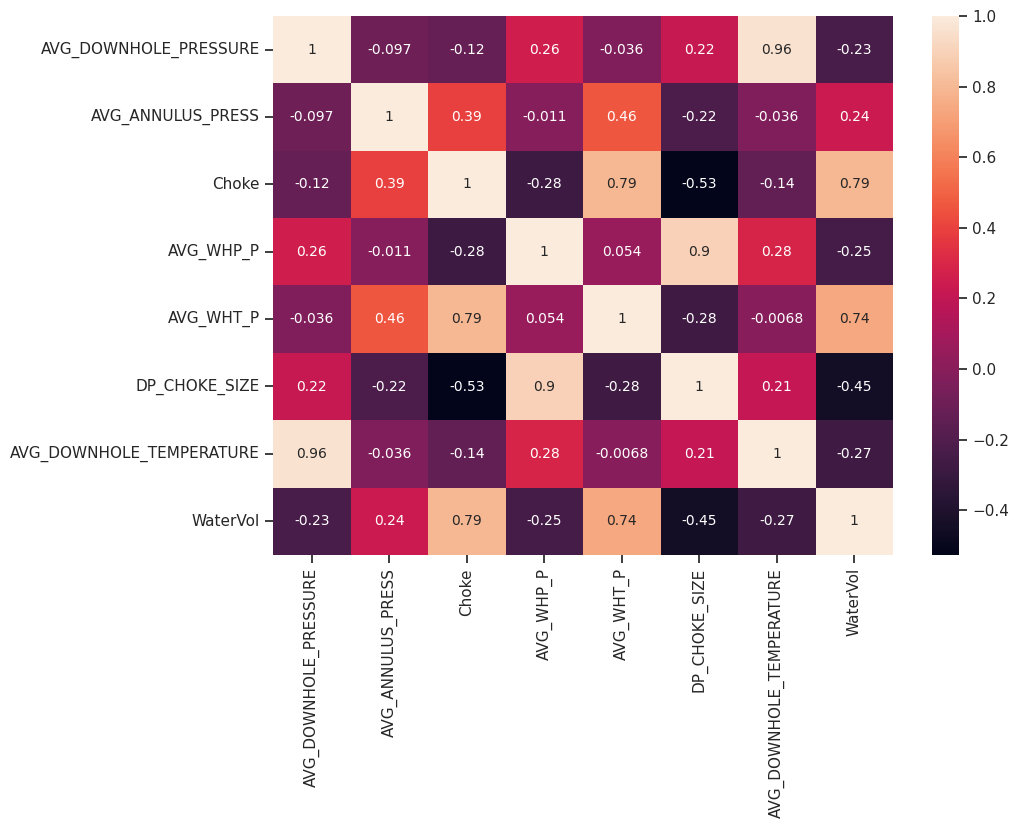

In [ ]:
dd = cleandata[['AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'Choke', 'AVG_WHP_P','AVG_WHT_P', 'DP_CHOKE_SIZE', 'AVG_DOWNHOLE_TEMPERATURE', 'WaterVol']]
corr_mx = dd.corr()
f, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10})

In [ ]:
cleandata.shape

(15634, 16)

In [ ]:
# Create a matrix scatterplot
#import seaborn as sns 
sns.pairplot(cleandata, y_vars=['AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'Choke', 'AVG_WHP_P','AVG_WHT_P', 'DP_CHOKE_SIZE', 'AVG_DOWNHOLE_TEMPERATURE'], x_vars=['AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'Choke', 'AVG_WHP_P','AVG_WHT_P', 'DP_CHOKE_SIZE', 'AVG_DOWNHOLE_TEMPERATURE'], hue = 'Well', palette = "bright")


Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='Well', ylabel='AVG_DOWNHOLE_PRESSURE'>

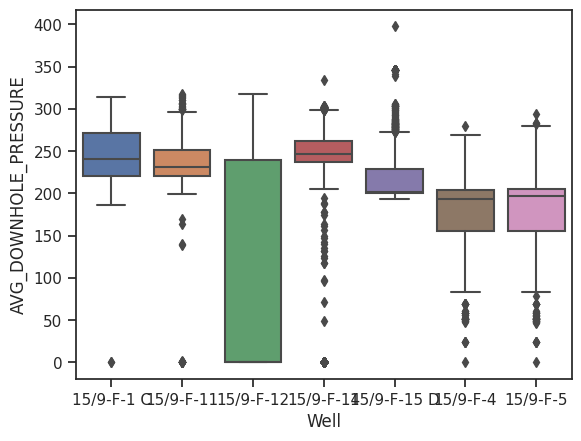

In [ ]:
sns.boxplot(x=cleandata['Well'], y=cleandata['AVG_DOWNHOLE_PRESSURE'])

<Axes: xlabel='Well', ylabel='AVG_DOWNHOLE_TEMPERATURE'>

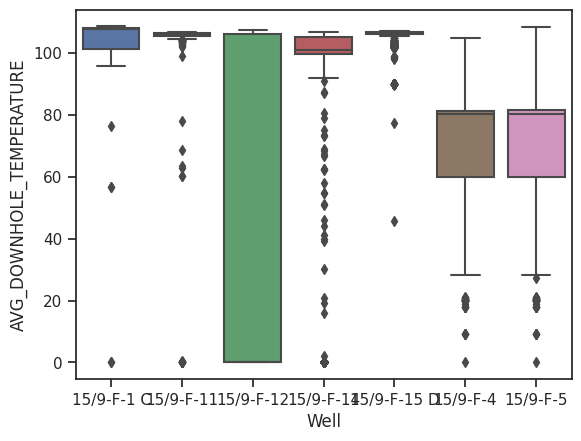

In [ ]:
sns.boxplot(x=cleandata['Well'], y=cleandata['AVG_DOWNHOLE_TEMPERATURE'])

<Axes: xlabel='Well', ylabel='AVG_DP_TUBING'>

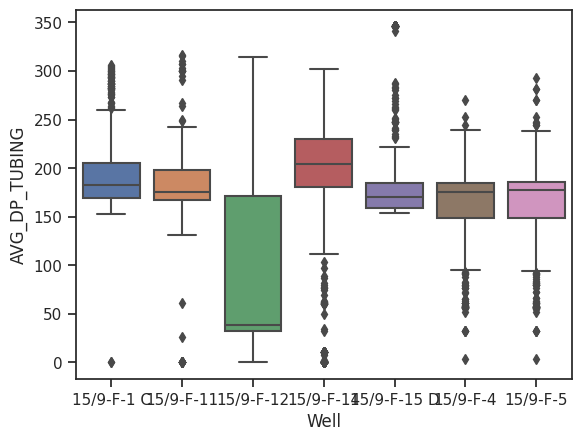

In [ ]:
sns.boxplot(x=cleandata['Well'], y=cleandata['AVG_DP_TUBING'])

In [ ]:
cleandata= cleandata[(cleandata ['AVG_DP_TUBING'] < 230)]

<Axes: xlabel='Well', ylabel='AVG_ANNULUS_PRESS'>

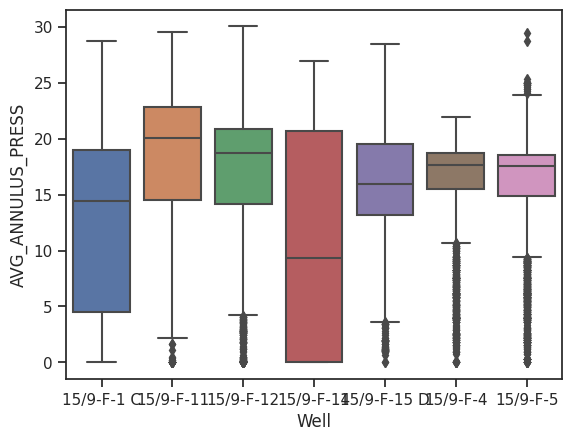

In [ ]:
sns.boxplot(x=cleandata['Well'], y=cleandata['AVG_ANNULUS_PRESS'])

In [ ]:
cleandata= cleandata[(cleandata ['AVG_ANNULUS_PRESS'] > 0)]

<Axes: xlabel='Well', ylabel='Choke'>

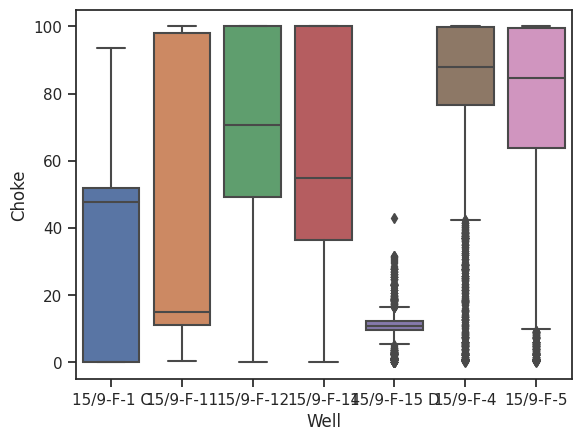

In [ ]:
sns.boxplot(x=cleandata['Well'], y=cleandata['Choke'])

In [ ]:
cleandata= cleandata[(cleandata ['Choke'] > 0)]

<Axes: xlabel='Well', ylabel='AVG_WHP_P'>

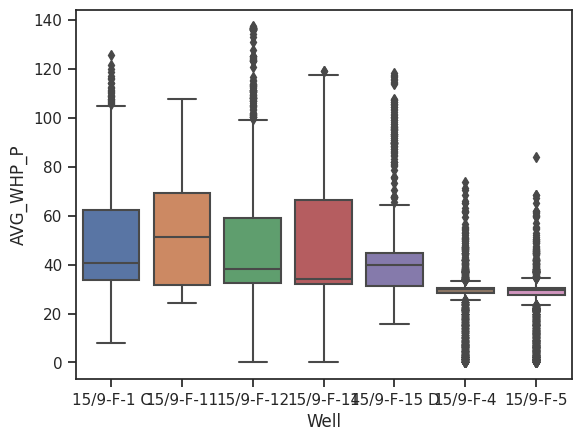

In [ ]:
sns.boxplot(x=cleandata['Well'], y=cleandata['AVG_WHP_P'])

In [ ]:
cleandata= cleandata[(cleandata ['AVG_WHP_P'] < 90)]

<Axes: xlabel='Well', ylabel='DP_CHOKE_SIZE'>

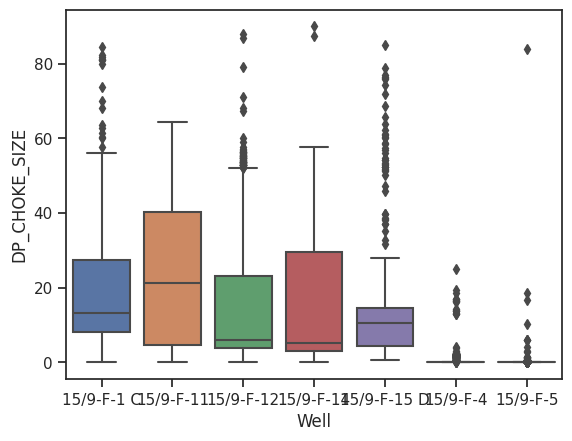

In [ ]:
sns.boxplot(x=cleandata['Well'], y=cleandata['DP_CHOKE_SIZE'])

In [ ]:
cleandata= cleandata[(cleandata ['DP_CHOKE_SIZE'] < 40)]

<Axes: xlabel='Well', ylabel='GasVol'>

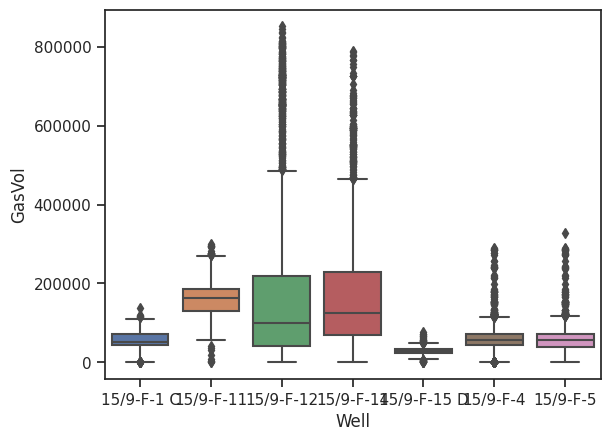

In [ ]:
sns.boxplot(x=cleandata['Well'], y=cleandata['GasVol'])

In [ ]:
cleandata= cleandata[(cleandata ['GasVol'] < 400000)]

<Axes: xlabel='Well', ylabel='WaterVol'>

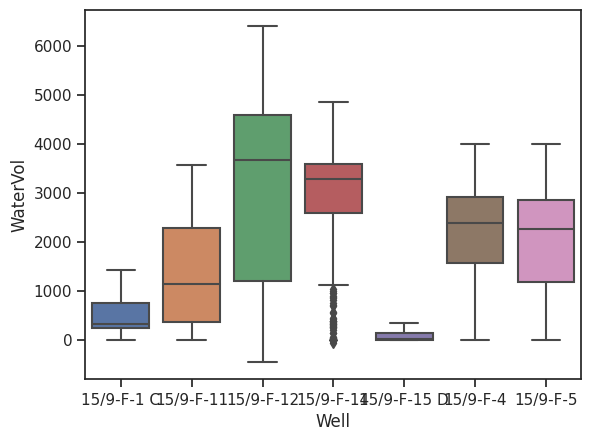

In [ ]:
sns.boxplot(x=cleandata['Well'], y=cleandata['WaterVol'])

**I will drop well 15/9-F-12 because the well had abnormal values of downhole temperature and pressure**

In [ ]:
New_df = cleandata[~cleandata.isin(['15/9-F-12']).any(axis=1)]

In [ ]:
#Statistical description
New_df.describe().T.sort_values(by='count', ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='red')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,9425.000000,20.726718,7.467199,0.000000,24.000000,24.000000,24.000000,25.000000
AVG_DOWNHOLE_PRESSURE,9425.000000,194.844803,42.436435,0.000000,164.114800,200.968800,220.531000,282.495000
AVG_DOWNHOLE_TEMPERATURE,9425.000000,82.295076,21.813609,0.000000,61.207600,81.192400,103.107600,108.502000
AVG_DP_TUBING,9425.000000,172.892819,31.798178,0.000000,154.748000,178.506000,187.001000,229.997000
AVG_ANNULUS_PRESS,9425.000000,16.652279,4.751272,0.001000,15.099400,17.682400,19.231600,29.532000
Choke,9425.000000,68.153243,34.734059,0.000140,38.646690,82.026550,99.583334,100.000000
AVG_WHP_P,9425.000000,30.787064,10.161605,0.000000,28.649800,30.199800,32.042000,75.906000
AVG_WHT_P,9425.000000,67.864028,22.592017,0.000000,58.684000,77.026200,85.341000,89.871000
DP_CHOKE_SIZE,9425.000000,3.347409,7.154298,0.000000,0.000000,0.000000,2.903000,39.983000
OilVol,9425.000000,459.278111,374.189534,0.000000,261.000000,378.200000,518.200000,2830.000000


In [ ]:
# Create a matrix scatterplot
sns.pairplot(New_df, vars=['AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'Choke', 'AVG_WHP_P','AVG_WHT_P', 'DP_CHOKE_SIZE', 'AVG_DOWNHOLE_TEMPERATURE', 'WaterVol', 'GasVol'], hue = 'Well', palette = "bright")

Output hidden; open in https://colab.research.google.com to view.

When this code is executed, it will create a heatmap with rows and columns corresponding to the rows and columns of New_df, respectively. The cells in the heatmap will be colored based on the presence or absence of null values in the corresponding cells of New_df. For example, cells with null values might be colored differently from cells with non-null values, making it easier to visually identify the patterns of missingness in the dataset. By using this heatmap, you can quickly identify which features still have missing values.

<Axes: >

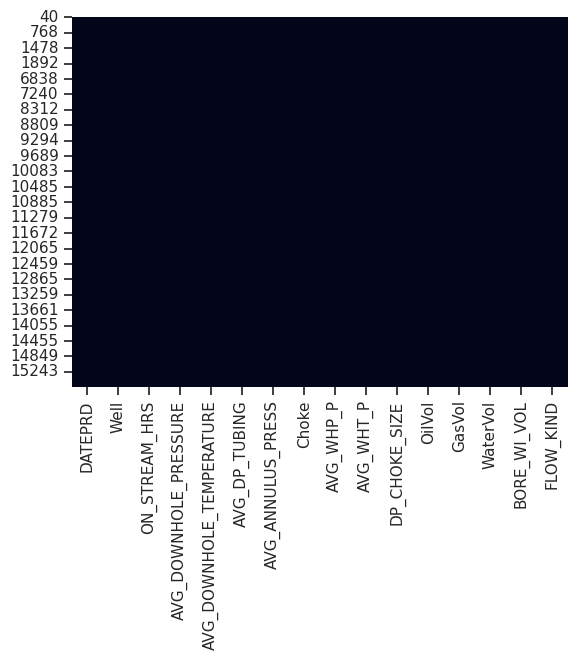

In [ ]:
sns.heatmap(New_df.isnull(), cbar=False)

In [ ]:
cleaneddata = New_df.copy()

# 2. Exploratory Data Analysis

In [ ]:
# This line of code selects a subset of columns the cleaneddata dataframe and assigns them to a new DataFrame called data
data = cleaneddata[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'Choke', 'AVG_WHP_P','AVG_WHT_P', 'DP_CHOKE_SIZE', 'GasVol', 'WaterVol']]

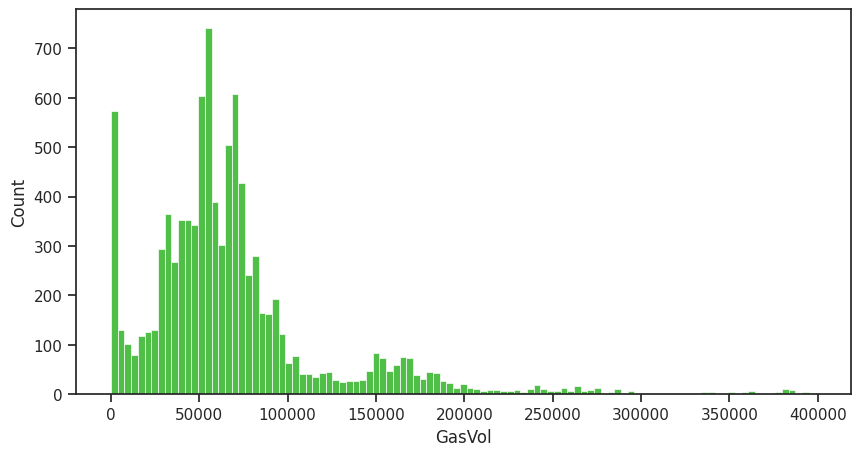

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='GasVol', kde=False, color="#23B01A", 
             alpha=0.8, ax=ax)
ax.set(ylabel="Count")
plt.show()


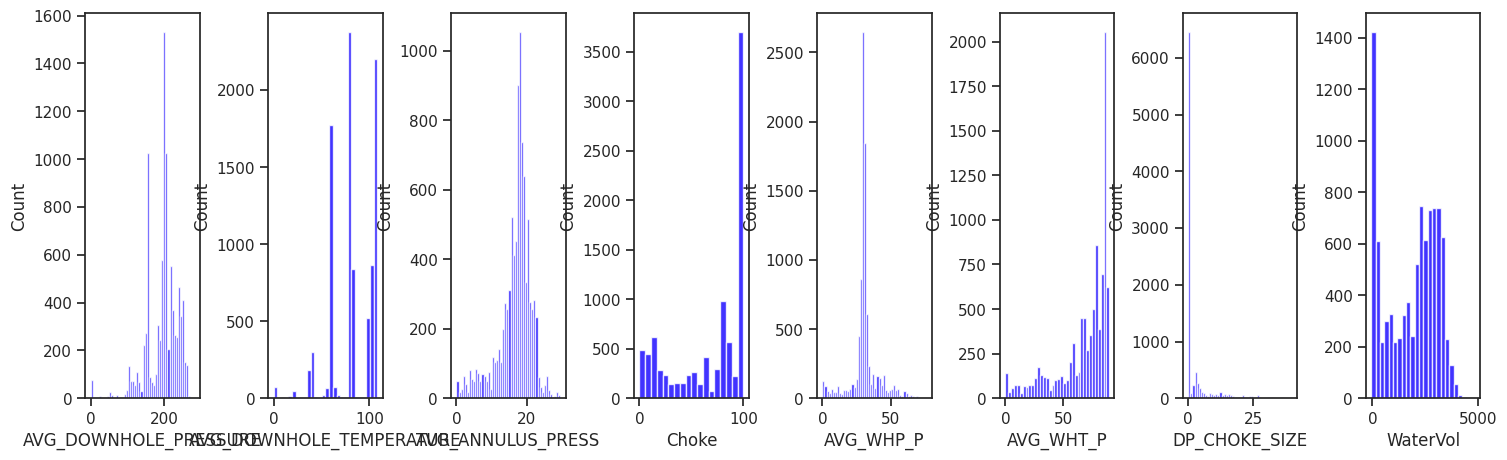

In [ ]:
fig, axes = plt.subplots(1, 8, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'Choke', 'AVG_WHP_P','AVG_WHT_P', 'DP_CHOKE_SIZE', 'WaterVol']):
    sns.distplot(data[v], kde=False, color="#1100FF", 
                 hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

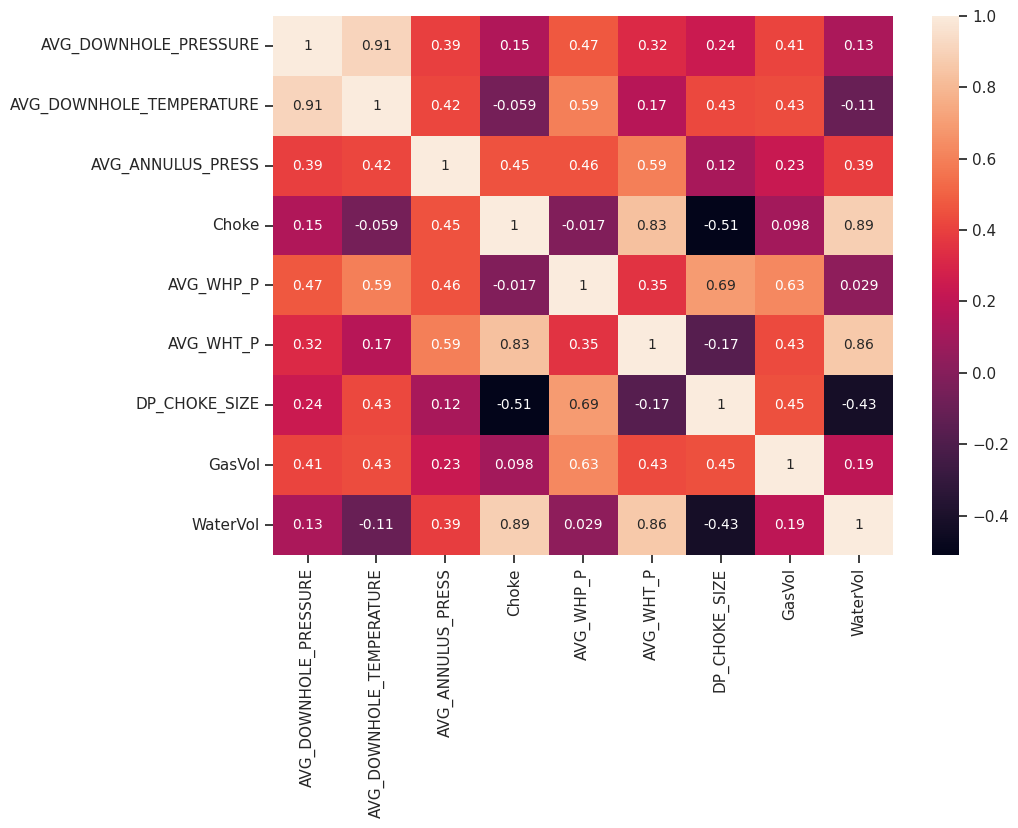

In [ ]:
# make a correlation plot (heatmap) to visualize the numerical variables
corr_mx = data.corr()
f, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10})

**From reviewing the production data, there is multicollinearity observed in the dataset.**

In [ ]:
#Export cleaned data for safekeeping
data.to_csv(r'newdata.csv', index = False)

In [ ]:
lists=["GasVol", "WaterVol", "AVG_DOWNHOLE_PRESSURE", "AVG_ANNULUS_PRESS", "AVG_WHP_P"]
input=data[lists]
input

,GasVol,WaterVol,AVG_DOWNHOLE_PRESSURE,AVG_ANNULUS_PRESS,AVG_WHP_P
40,110078.0,0.0,223.6030,20.8530,67.2560
41,117388.0,0.0,220.1020,19.3612,65.4070
42,109517.0,0.0,220.4900,25.1426,65.3140
43,109362.0,0.0,220.1540,25.1426,64.9160
44,104993.0,0.0,220.0660,28.6000,64.6910
...,...,...,...,...,...
15629,0.0,0.0,121.8468,0.2730,0.0780
15630,0.0,0.0,183.1694,0.2870,0.0850
15631,0.0,0.0,123.2350,0.2860,0.0850
15632,0.0,0.0,138.3628,0.2720,0.0750


In [ ]:
#Export cleaned data for safekeeping
input.to_csv(r'new_data.csv', index = False)

# 3. Feature Engineering

**Feature Extraction**

In [ ]:
df_sd_ = input[['WaterVol', 'AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P']]
# create list of column names to use later
col_names = list(df_sd_)
print(col_names)

['WaterVol', 'AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P']


**Principal Components Analysis**

First, before implementing the dimensionality technique (particurly the PCA and for consistency across all the reduction techniques choice), data needs to be scaled and it is a rule of thumb to make use of the StandardScaler. This is because, for variances to be measured and to have optimal ratio differences, the mean has to be zero with a unit variance. Other scaler methods will not produce this conditions like Standardscalar would, hence the suitability.

*Reference*

1.) https://en.m.wikipedia.org/wiki/Principal_component_analysis

2.) https://www.researchgate.net/post/Is-it-necessary-to-normalize-data-before-performing-principle-component-analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df_sd_)

df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,WaterVol,AVG_DOWNHOLE_PRESSURE,AVG_ANNULUS_PRESS,AVG_WHP_P
0,-1.533187,0.677713,0.884173,3.589086
1,-1.533187,0.595209,0.570177,3.407116
2,-1.533187,0.604352,1.787052,3.397964
3,-1.533187,0.596434,1.787052,3.358795
4,-1.533187,0.594360,2.514770,3.336651


Text(0.5, 1.0, "Variance Explained by PCA's")

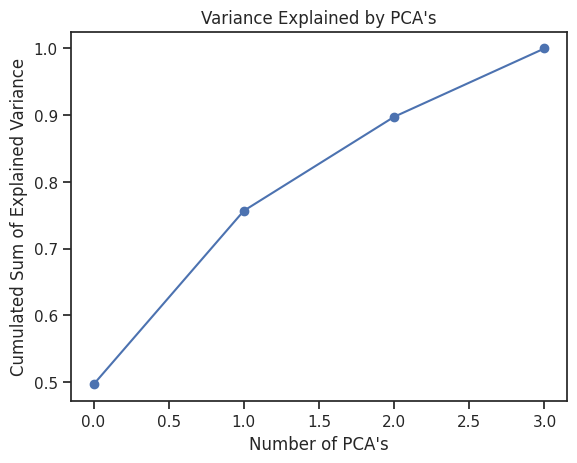

In [ ]:
df_PCA = df_s[['WaterVol', 'AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P']]
from sklearn.decomposition import PCA
pca = PCA(n_components=df_PCA.shape[1])
pca.fit(df_PCA)
ratios = pca.explained_variance_ratio_

# Plot the explained variance ratios
x = np.arange(df_PCA.shape[1])
plt.plot(x, np.cumsum(ratios), '-o')
plt.xlabel("Number of PCA's")
plt.ylabel("Cumulated Sum of Explained Variance")
plt.title("Variance Explained by PCA's")

In [ ]:
pca.explained_variance_ratio_

array([0.49656038, 0.26024515, 0.14076367, 0.10243079])

I need 3 of my features to analyze up to 90% of my data, no point in reducing the dimensionality.

In [ ]:
# Importing PCA from Sklearn
from sklearn.decomposition import PCA

# Creating PCA object
pca1 = PCA(n_components=4)               
principalComponents = pca1.fit_transform(df_PCA)

#Creating the dataframe
PCA_data = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

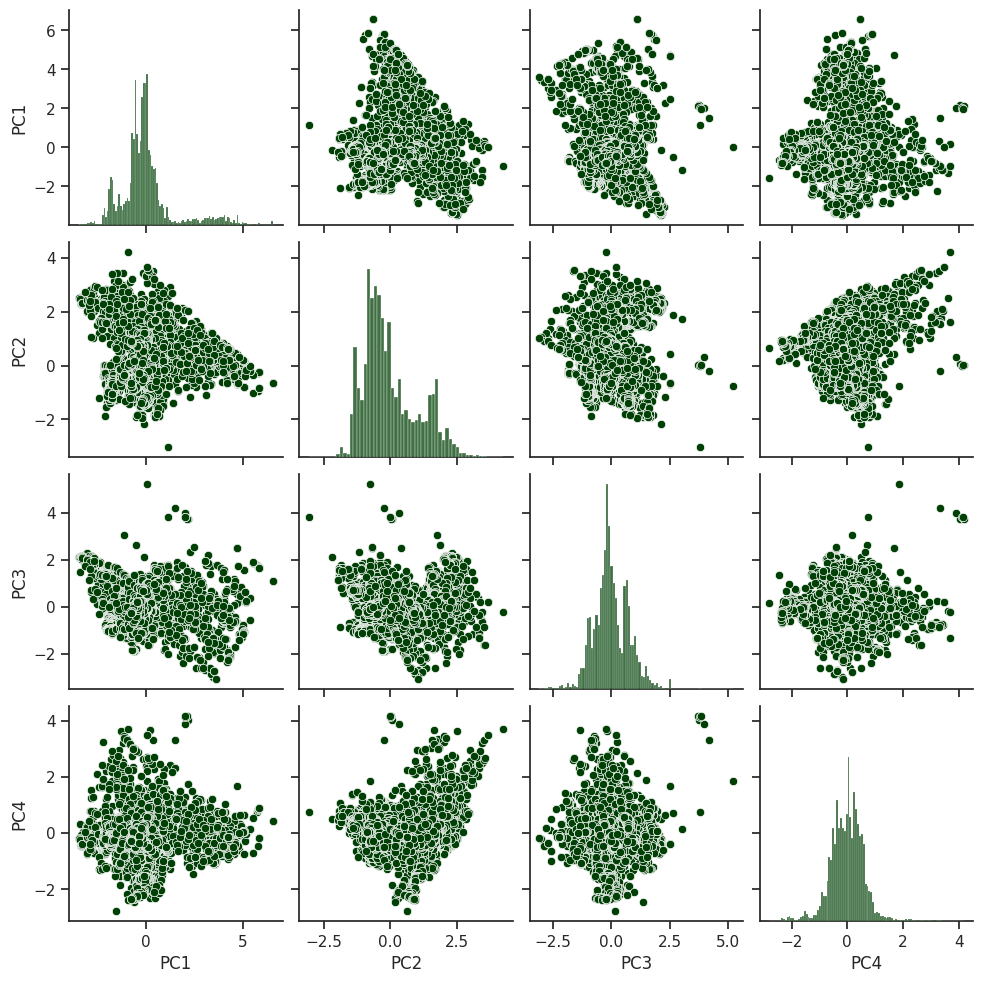

In [ ]:
# Create an array with the colors you want to use
colors = ["#004005"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
sns.pairplot(PCA_data, palette=customPalette)

# 4. Model Development Using Original Data

In [ ]:
InputData = input[['WaterVol', 'AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P']]
Output = input[['GasVol']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(InputData)
y = scaler.fit_transform(Output)

In [ ]:
# split data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

This function is to conduct the grid search to find the optimized hyper parameters for model, using default settings as initialization step

In [ ]:
def grid_search(clf, param_grid, X_train=X_train, y_train=y_train):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    grid = GridSearchCV(estimator=clf, 
                        param_grid=param_grid, 
                        scoring='r2', 
                        cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    
    return grid.best_estimator_

# Linear Regression

In [ ]:
# Linear regression model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR_best = grid_search(LR, {})

0.4617797727943545


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_LR = LR_best.predict(X_test)

In [ ]:
# Fit the Linear Regression model on the training data
LR_best.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = LR_best.predict(X_train)

# Calculate R2, MSE, and RMSE for the test data
mse = mean_squared_error(y_test, y_pred_LR)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_LR)


# Calculate R2, MSE, and RMSE for the training data
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Print the results
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("Train R2:", r2_train)
print("Train MSE:", mse_train)
print("Train RMSE:", rmse_train)

MSE: 0.010236268362132936
RMSE: 0.10117444520299054
R2: 0.45866076591372773
Train R2: 0.4643544579668054
Train MSE: 0.010134924097074833
Train RMSE: 0.10067236014455423


Text(0.5, 1.0, 'Gas Vol: R2 = 0.45866076591372773')

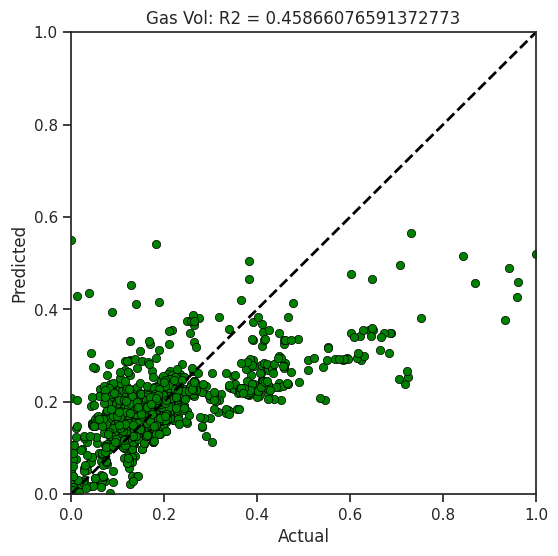

In [ ]:
# Also create plot for predicted versus actual
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])           
plt.scatter(x=y_test[:,0], y=y_pred_LR[:,0], 
            color="green", edgecolors="#000000", linewidths=0.5)

plt.plot([0, 1],[0, 1], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted') # Predicted values on y axis
plt.xlabel('Actual') 
plt.title('Gas Vol: R2 = %s'%(r2))


In [ ]:
params = LR_best.get_params()
# do something...
print(params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


**I also ran the statsmodel to validate my Linear Regression result**

**Statsmodel**

Statsmodels is a Python library that provides a wide range of statistical tools and models for data analysis. It is built on top of NumPy and pandas, and offers a convenient interface for workin Statsmodels is particularly useful for researchers and data scientists who need to conduct statistical analysis and modeling in Python. By providing a range of models and tools for statistical analysis, it allows users to perform sophisticated data analysis without the need for a separate statistical software package.*g* with different types of statistical models.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_cols = ['WaterVol', 'AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P']
y_cols = ['GasVol']

y_train_ = pd.DataFrame(y_train, columns = y_cols)
X_train_ = pd.DataFrame(X_train, columns = X_cols)

In [ ]:
whole_train = X_train_.copy()
for col in y_train_.columns:
    whole_train[col] = y_train_[col]
whole_train.head()

,WaterVol,AVG_DOWNHOLE_PRESSURE,AVG_ANNULUS_PRESS,AVG_WHP_P,GasVol
0,0.083384,0.866745,0.800142,0.841541,0.301157
1,0.011999,0.780530,0.122014,0.015893,0.000000
2,0.687736,0.550641,0.642538,0.400184,0.144822
3,0.593614,0.714506,0.511185,0.397637,0.203121
4,0.558023,0.740618,0.584877,0.384929,0.130812


In [ ]:
train_col = ['WaterVol', 'AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P','GasVol']

In [ ]:
def train_test(target,feature_combination):
    """
    INPUT:
    -target(str): the target variable
    -feature_combination (str): combination of the features 
    """
    
    results = smf.ols('{} ~ {}'.format(target, feature_combination),
                      data = whole_train).fit()
    print(results.summary())

    # test data
    y_pred_sm_GasVol= results.predict(X_test)
    print('\n\n The following are the metrics on the test data')
    scores(y_pred_sm_GasVol, y_test[target])
    

In [ ]:
train_test('GasVol','WaterVol+AVG_DOWNHOLE_PRESSURE+AVG_ANNULUS_PRESS+AVG_WHP_P')


                            OLS Regression Results                            
Dep. Variable:                 GasVol   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     1735.
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:03:46   Log-Likelihood:                 7025.2
No. Observations:                8011   AIC:                        -1.404e+04
Df Residuals:                    8006   BIC:                        -1.401e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.14

# Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
model = RandomForestRegressor(n_estimators=200, random_state = 32)
RF_best = grid_search(model, {})

model.fit(X_train, y_train)  # Fit the model to the training dataset
training_R2 = model.score(X_train, y_train) # Compute training R2

0.9385200846321953


Text(0.5, 1.0, 'Training R2 = 0.99  Test R2 = 0.95')

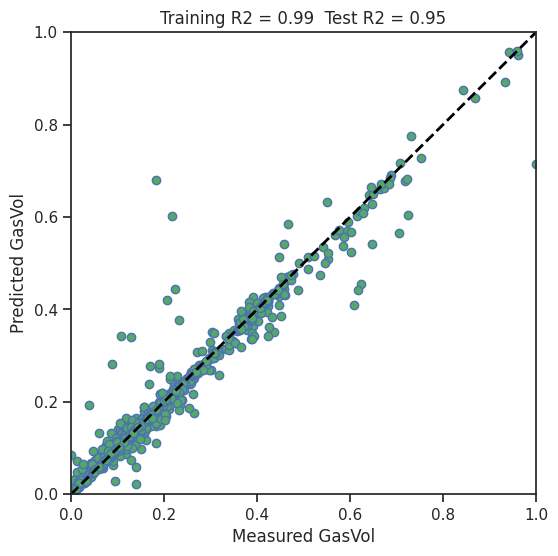

In [ ]:
y_pred_rf = model.predict(X_test)  # Make prediction using test 
test_R2 = model.score(X_test, y_test)       # Compute test R2
    
error = mean_squared_error(y_test, y_pred_rf) # Calculate MSE
residual = (y_test - y_pred_rf)  
   
# Also create a series of plots for predicted versus actual GasVol for different values of K
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])
plt.scatter(y_test, y_pred_rf, c = 'g', edgecolor = 'b')
plt.plot([0, 1],[0, 1], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted GasVol') 
plt.xlabel('Measured GasVol') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### Using Cross-Validation for Tuning the Hyperparameter K.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [6, 10, 15], 'min_samples_split': [10, 20], 'n_estimators': [100, 200]}
grid = GridSearchCV(RandomForestRegressor(random_state=12), param_grid=param_grid, verbose=3, cv=5)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100;, score=0.830 total time=   1.3s
[CV 2/5] END bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100;, score=0.869 total time=   1.2s
[CV 3/5] END bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100;, score=0.874 total time=   1.2s
[CV 4/5] END bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100;, score=0.878 total time=   1.2s
[CV 5/5] END bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=100;, score=0.878 total time=   1.2s
[CV 1/5] END bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200;, score=0.828 total time=   2.4s
[CV 2/5] END bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200;, score=0.871 total time=   4.1s
[CV 3/5] END bootstrap=True, max_depth=6, min_samples_split=10, n_estimators=200;, score=0.875 total time=   2.4s
[CV 4/5] END bootstrap=True

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12),
             param_grid={'bootstrap': [True], 'max_depth': [6, 10, 15],
                         'min_samples_split': [10, 20],
                         'n_estimators': [100, 200]},
             verbose=3)

In [ ]:
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'bootstrap': True, 'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy:0.9340031118175439


In [ ]:
cv_results = pd.DataFrame(grid.cv_results_)

# generate a subset of the table
cv_results_tiny = cv_results[['param_max_depth', 'param_bootstrap', 'param_n_estimators', 'param_min_samples_split', 'mean_test_score','std_test_score']]

# rank them based on test scores
cv_results_tiny.sort_values(by='mean_test_score', ascending=False).head(3)

,param_max_depth,param_bootstrap,param_n_estimators,param_min_samples_split,mean_test_score,std_test_score
8,15,True,100,10,0.934003,0.023167
9,15,True,200,10,0.933902,0.023680
10,15,True,100,20,0.926787,0.023958


In [ ]:
RF_tuned = RandomForestRegressor(random_state = 12, bootstrap = True, max_depth = 15, min_samples_split = 10, n_estimators = 100)

In [ ]:
RF_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=10, random_state=12)

In [ ]:
from sklearn.model_selection import cross_val_score

RF_tuned = RandomForestRegressor(max_depth=15, min_samples_split=10, n_estimators=100)
rmse = -cross_val_score(RF_tuned, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)

### Apply Best Hyperparameter to the Test Data

In [ ]:
RF_tuned = RandomForestRegressor(max_depth=15, min_samples_split=10, n_estimators=100)
RF_tuned.fit(X_train, y_train) 
training_R2 = RF_tuned.score(X_train, y_train) # Compute training R2

In [ ]:
y_pred_rf = RF_tuned.predict(X_test)  # Make prediction using test 
test_R2 = RF_tuned.score(X_test, y_test)  

Text(0.5, 1.0, 'Training R2 = 0.98  Test R2 = 0.95')

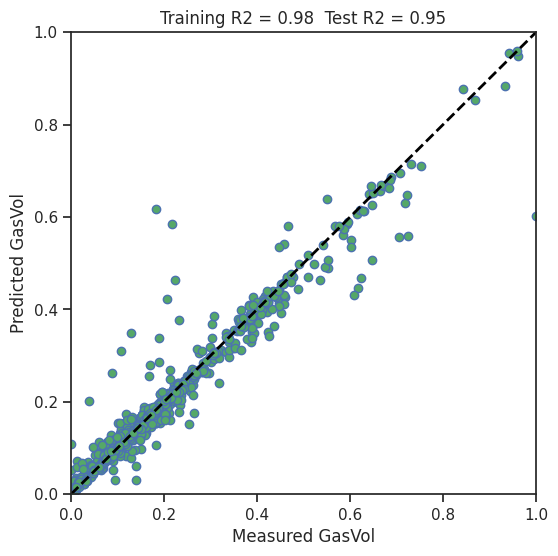

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])
plt.scatter(y_test, y_pred_rf, c = 'g', edgecolor = 'b')
plt.plot([0, 1],[0, 1], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted GasVol') 
plt.xlabel('Measured GasVol') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## XGBOOST Regression Model

XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning algorithm used for both regression and classification tasks. It is an ensemble learning method that combines the predictions of several decision trees, each trained on different subsets of the training data, to produce a final prediction. Some key features of XGBoost include:

* Regularization techniques to prevent overfitting.
* Support for parallel processing to speed up training time.
* Ability to handle missing values in the dataset.
* Support for different types of objective functions and evaluation metrics.

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Train an XGBoost model on the training set
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

# Predict on the test set and calculate MSE and R2
y_pred_test = xgb_reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Predict on the train set and calculate MSE and R2
y_pred_train = xgb_reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the results
print("Test MSE:", mse_test)
print("Test R2:", r2_test)
print("Train MSE:", mse_train)
print("Train R2:", r2_train)


Test MSE: 0.001251120931170107
Test R2: 0.9338351806861183
Train MSE: 0.00012236173676894298
Train R2: 0.9935330034849851


Text(0.5, 1.0, 'Training R2 = 0.99  Test R2 = 0.93')

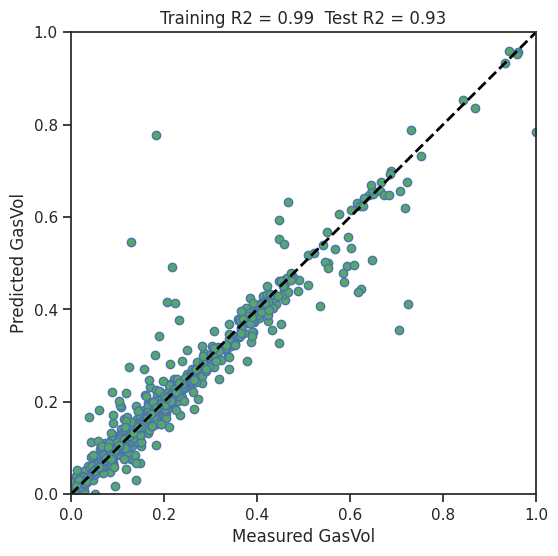

In [ ]:
# Also create plot for predicted versus actual
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])
plt.scatter(y_test, y_pred_test, c = 'g', edgecolor = 'b')
plt.plot([0, 1],[0, 1], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted GasVol') 
plt.xlabel('Measured GasVol') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(r2_train, r2_test))

**XGBoost Model Optimization**

I would be optimizing my model using the 7 parameters which I have listed below.
* max_depth: refers to the maximum depth of each tree in the ensemble. It controls the complexity of the model and prevents overfitting. A lower value for max_depth can lead to a simpler model and less overfitting.

* n_estimators: refers to the number of trees in the ensemble. Increasing the number of trees can improve the performance of the model, but it can also increase training time and the risk of overfitting.

* learning_rate: is a parameter that controls the contribution of each tree in the ensemble. A lower value for learning_rate can lead to slower learning but can result in a more accurate model.

* subsample: This hyperparameter controls the fraction of observations to be randomly sampled for each tree. The default value is 1.0, which means that all observations are used to build each tree. A value less than 1.0 means that a fraction of observations will be randomly sampled for each tree, which can reduce overfitting.

* colsample_bytree: This hyperparameter controls the fraction of features to be randomly sampled for each tree. The default value is 1.0, which means that all features are used to build each tree. A value less than 1.0 means that a fraction of features will be randomly sampled for each tree, which can reduce overfitting.

* reg_alpha: This hyperparameter controls L1 regularization, which adds a penalty term to the loss function that is proportional to the absolute value of the model weights. The default value is 0, which means that no L1 regularization is applied. A positive value means that L1 regularization is applied, which can reduce overfitting.

* reg_lambda: This hyperparameter controls L2 regularization, which adds a penalty term to the loss function that is proportional to the square of the model weights. The default value is 1, which means that L2 regularization is applied. A value less than 1 means that less L2 regularization is applied, which can reduce overfitting.



In [ ]:
# Import necessary libraries
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameters to search over
params = {
    'max_depth': range(3, 8),
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Create the XGBoost regressor object
xgb_reg = XGBRegressor()

# Create a randomized search object with 100 iterations
random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=200, cv=5, n_jobs=-1, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the mean squared error and r2 score on test data
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Create a new XGBoost regressor object with the best hyperparameters and train on the entire dataset
xgb_reg = XGBRegressor(**random_search.best_params_)
xgb_reg.fit(X, y)

# Predict on the train set and calculate MSE and R2
y_pred_train = xgb_reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the results
print("Test MSE:", mse_test)
print("Test R2:", r2_test)
print("Train MSE:", mse_train)
print("Train R2:", r2_train)


Best Hyperparameters: {'subsample': 1, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1}
Test MSE: 0.001228928268118435
Test R2: 0.9350088270574043
Train MSE: 0.0002163232645826943
Train R2: 0.9885669994958096


## Time Series Forecasting (LSTM)

LSTM time series forecasting is a type of machine learning model used to predict future values of a time series based on its past values. It uses a special type of neural network called a Long Short-Term Memory (LSTM) network, which is able to capture long-term dependencies in the time series data. LSTM networks have a memory cell and three gates (input, output, and forget), which allow them to selectively remember or forget information from previous time steps. The model is trained on historical data, and then used to forecast future values of the time series.

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the mean squared error for train and test sets
mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)

# Calculate the R2 score for train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE train:", mse_train)
print("MSE test:", mse_test)
print("R2 train:", r2_train)
print("R2 test:", r2_test)


Epoch 1/50
251/251 [==============================] - 14s 23ms/step - loss: 0.0182 - val_loss: 0.0163
Epoch 2/50
251/251 [==============================] - 5s 21ms/step - loss: 0.0160 - val_loss: 0.0146
Epoch 3/50
251/251 [==============================] - 4s 16ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 4/50
251/251 [==============================] - 4s 16ms/step - loss: 0.0105 - val_loss: 0.0094
Epoch 5/50
251/251 [==============================] - 5s 21ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/50
251/251 [==============================] - 4s 16ms/step - loss: 0.0089 - val_loss: 0.0088
Epoch 7/50
251/251 [==============================] - 4s 16ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 8/50
251/251 [==============================] - 5s 21ms/step - loss: 0.0082 - val_loss: 0.0090
Epoch 9/50
251/251 [==============================] - 4s 17ms/step - loss: 0.0079 - val_loss: 0.0089
Epoch 10/50
251/251 [==============================] - 4s 17ms/step - loss: 0.0079 - val_l

### LSTM Hyperparameters tuning

Hyperparameter tuning for LSTM (Long Short-Term Memory) models is the process of finding the best set of hyperparameters that result in the highest performance of the model. Hyperparameters are adjustable settings of the model that cannot be learned from the data, such as learning rate, dropout rate, number of LSTM units, etc.

* learning_rate: This hyperparameter controls the step size of the optimizer during model training. The default value is typically 0.01, but lower values like 0.001 or 0.0001 may be used for better convergence and to avoid overshooting the minimum of the loss function.

* dropout_rate: This hyperparameter controls the fraction of inputs that are randomly excluded from each update during training. The default value is 0.0, which means that no inputs are excluded. A value greater than 0.0 means that a fraction of inputs will be excluded, which can reduce overfitting and improve model generalization.

* units: This hyperparameter controls the number of neurons in each layer of the neural network. The default value is often 32, but higher values like 64, 128, or 256 may be used for more complex models. Increasing the number of units may improve model performance, but may also increase the risk of overfitting if not regularized properly.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import time

# Define the model architecture
def create_model(learning_rate, dropout_rate, units):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the hyperparameters to search
param_dist = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.2, 0.3],
    'units': [32, 64]
}

# Create the model
model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Perform random search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=5, verbose=1, random_state=42, scoring='neg_mean_squared_error')

# Add early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

start_time = time.time()
random_search.fit(X_train, y_train, callbacks=[early_stopping])
end_time = time.time()
print('Time taken for hyperparameter search:', end_time - start_time, 'seconds')

# Print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# Make predictions on the test set using the best hyperparameters
model = create_model(**random_search.best_params_)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, callbacks=[early_stopping], validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = np.mean((y_pred - y_test)**2)
print("MSE:", mse)

# Calculate the R2 score on the training set using the best hyperparameters
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("R2 score on the training set:", r2_train)

# Calculate the R2 score on the test set using the best hyperparameters
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print("R2 score on the test set:", r2_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Time taken for hyperparameter search: 4966.6126589775085 seconds
Best hyperparameters: {'units': 64, 'learning_rate': 0.01, 'dropout_rate': 0.3}
45/45 [==============================] - 2s 5ms/step
MSE: 0.0025242864073302443
251/251 [==============================] - 1s 5ms/step
R2 score on the training set: 0.8732395585478412
45/45 [==============================] - 0s 5ms/step
R2 score on the test set: 0.866504548140451


## Polynomial Regression Model

Polynomial regression is a type of regression analysis used to model the relationship between the independent variable (or predictor variable) and the dependent variable (or response variable) when the relationship is not linear. Polynomial regression involves fitting a polynomial equation to the data, which allows for curves and nonlinear relationships to be modeled. The degree of the polynomial determines the complexity of the model, with higher degree polynomials allowing for more complex relationships to be captured.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create polynomial features up to degree 3
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the transformed data
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Evaluate the model on the test set
y_pred_test = lin_reg.predict(X_test_poly)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test_poly = r2_score(y_test, y_pred_test)

# Evaluate the model on the train set
y_pred_train = lin_reg.predict(X_train_poly)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train_poly = r2_score(y_train, y_pred_train)

# Print the results
print("Test MSE:", mse_test)
print("Test R2:", r2_test_poly)
print("Train MSE:", mse_train)
print("Train R2:", r2_train_poly)


Test MSE: 0.005701285014783247
Test R2: 0.6984907825758484
Train MSE: 0.004936279558502634
Train R2: 0.739110415192486


Text(0.5, 1.0, 'Training R2 = 0.74  Test R2 = 0.70')

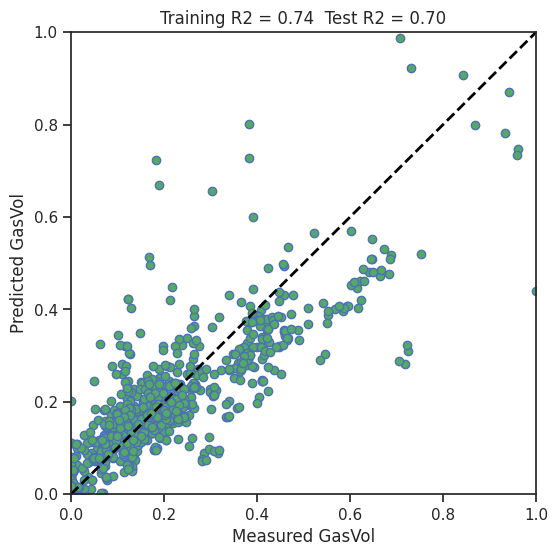

In [ ]:
# Also create plot for predicted versus actual
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])
plt.scatter(y_test, y_pred_test, c = 'g', edgecolor = 'b')
plt.plot([0, 1],[0, 1], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted GasVol') 
plt.xlabel('Measured GasVol') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(r2_train_poly, r2_test_poly))

#### Polynomial Regression Hyperparameters Tuning

Polynomial regression hyperparameters tuning involves finding the best combination of hyperparameters to use in a polynomial regression model to achieve optimal performance. The hyperparameters that can be tuned in polynomial regression include:

* Degree of the polynomial: This hyperparameter determines the order of the polynomial equation used to fit the data. Higher degree polynomials can fit the data more accurately, but may also overfit the data.

* Regressor__alpha: This hyperparameter controls the strength of the regularization term in the model. The default value is 1.0, which means that L2 regularization (ridge regression) is applied. A value of 0.0 means that no regularization is applied. A positive value means that L2 regularization is applied, which can reduce overfitting. The higher the alpha value, the stronger the regularization.

* Regressor__solver: This hyperparameter controls the solver to be used in the optimization process during model training. The default value is 'auto', which means that the solver is selected based on the input data. Other solver options include 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', and 'saga'. Each solver has its own strengths and weaknesses, and the choice of solver may impact the speed and accuracy of the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the pipeline
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', Ridge())
])

# Define the hyperparameter grid to search over
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],
    'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the GridSearchCV object
grid_search_P = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search_P.fit(X_train, y_train)

# Get the best model from the GridSearchCV object
best_model = grid_search_P.best_estimator_


# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best parameters:", grid_search_P.best_params_)
print("MSE:", mse)
print("R-squared:", r2)


Best parameters: {'poly__degree': 5, 'regressor__alpha': 0.001, 'regressor__solver': 'svd'}
MSE: 0.00489912446278225
R-squared: 0.7409125874242666


# 4b. Model Development Using PCA Data

In [ ]:
# split data into train and validation data
from sklearn.model_selection import train_test_split

Xp_train, Xp_valid, yp_train, yp_valid = train_test_split(PCA_data, y, test_size=0.15, random_state=42)

In [ ]:
def grid_search_PCA(clf, param_grid, X_train=Xp_train, y_train=yp_train):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    grid = GridSearchCV(estimator=clf, 
                        param_grid=param_grid, 
                        scoring='r2', 
                        cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    
    return grid.best_estimator_

Linear Regression

In [ ]:
# Linear regression model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR_best_PCA = grid_search_PCA(LR, {})

0.46177977279435456


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_LR_PCA = LR_best_PCA.predict(Xp_valid)
mse = mean_squared_error(yp_valid, y_pred_LR_PCA)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(yp_valid, y_pred_LR_PCA)
print("R2:", r2)

MSE: 0.010236268362132941
RMSE: 0.10117444520299057
R2: 0.4586607659137274


Text(0.5, 1.0, 'R2 = 0.4586607659137274  MSE = 0.010236  RMSE = 0.101174')

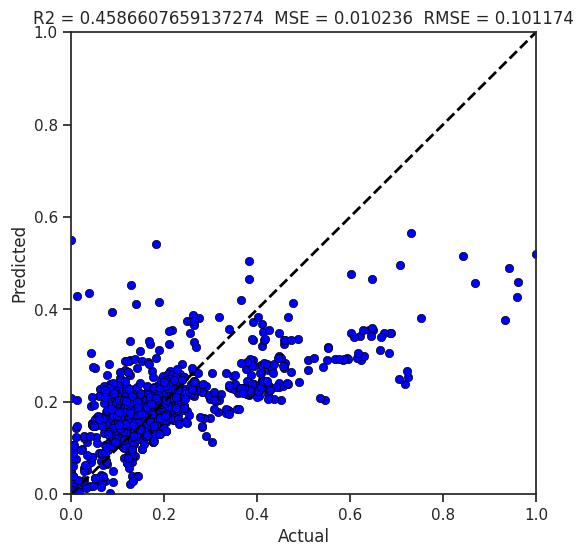

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])           #Choose the approp. length (was 160)
plt.scatter(x=yp_valid, y=y_pred_LR_PCA, 
            color="blue", edgecolors="#000000", linewidths=0.5)

plt.plot([0, 200],[0, 200], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted') # Predicted values on y axis
plt.xlabel('Actual') 
plt.title('R2 = %s  MSE = %f  RMSE = %f'%(r2, mse, rmse))

In [ ]:
params = LR_best_PCA.get_params()
# do something...
print(params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, random_state=100)
RF_best_PCA = grid_search_PCA(RF, {})

0.8844580892151326


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rf_PCA = RF_best_PCA.predict(Xp_valid)
mse = mean_squared_error(yp_valid, y_pred_rf_PCA)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(yp_valid, y_pred_rf_PCA)
print("R2:", r2)

MSE: 0.001499692070139033
RMSE: 0.03872585790062027
R2: 0.9206896372883725


Text(0.5, 1.0, 'R2 = 0.9206896372883725  MSE = 0.001500  RMSE = 0.038726')

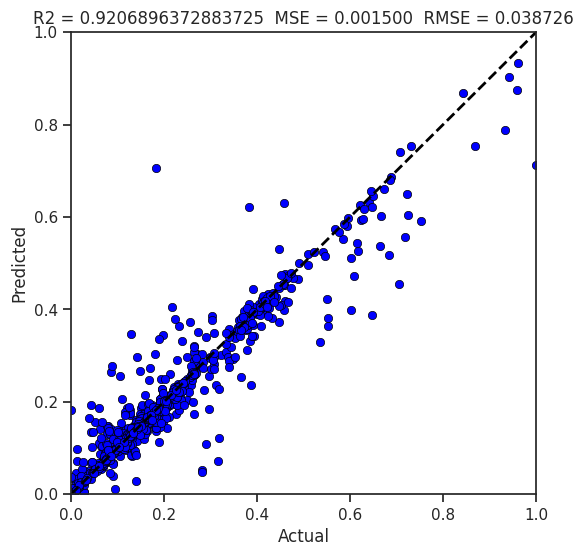

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])           #Choose the approp. length (was 160)
plt.scatter(x=yp_valid, y=y_pred_rf_PCA, 
            color="blue", edgecolors="#000000", linewidths=0.5)

plt.plot([0, 200],[0, 200], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted') # Predicted values on y axis
plt.xlabel('Actual') 
plt.title('R2 = %s  MSE = %f  RMSE = %f'%(r2, mse, rmse))

XGBOOST

In [ ]:
from xgboost import XGBRegressor
XGB_regressor = XGBRegressor(random_state=42)
XGB_best_PCA = grid_search_PCA(XGB_regressor, {})


0.8722536195561892


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_XGB_PCA = XGB_best_PCA.predict(Xp_valid)
mse = mean_squared_error(yp_valid, y_pred_XGB_PCA)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(yp_valid, y_pred_XGB_PCA)
print("R2:", r2)


MSE: 0.0019369638367199651
RMSE: 0.0440109513271409
R2: 0.8975647684558843


Text(0.5, 1.0, 'R2 = 0.8975647684558843  MSE = 0.001937  RMSE = 0.044011')

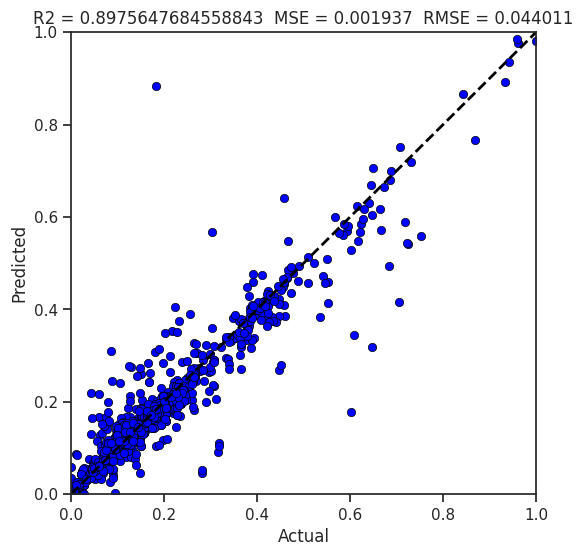

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])           #Choose the approp. length (was 160)
plt.scatter(x=yp_valid, y=y_pred_XGB_PCA, 
            color="blue", edgecolors="#000000", linewidths=0.5)

plt.plot([0, 200],[0, 200], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted') # Predicted values on y axis
plt.xlabel('Actual') 
plt.title('R2 = %s  MSE = %f  RMSE = %f'%(r2, mse, rmse))

POLYNOMIAL

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Create a pipeline with PolynomialFeatures and LinearRegression
poly_LR = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define the hyperparameters to tune using GridSearchCV
params = {
    'polynomialfeatures__degree': [2, 3, 4],
    'linearregression__fit_intercept': [True, False],
    'linearregression__positive': [True, False]
}

# Create a GridSearchCV object and fit the training data
grid_search_poly_LR = GridSearchCV(poly_LR, params, cv=5)
grid_search_poly_LR.fit(Xp_train, yp_train)   # assuming Xp_train is the PCA-transformed training data

# Get the best polynomial regression model
poly_LR_best_PCA = grid_search_poly_LR.best_estimator_


# Make predictions on the validation set
y_pred_poly_LR_PCA = poly_LR_best_PCA.predict(Xp_valid)   # assuming Xp_valid is the PCA-transformed validation data

# Calculate the evaluation metrics
mse = mean_squared_error(yp_valid, y_pred_poly_LR_PCA)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(yp_valid, y_pred_poly_LR_PCA)
print("R2:", r2)


MSE: 0.00506404627412835
RMSE: 0.0711621126311491
R2: 0.7321907911719832


Text(0.5, 1.0, 'R2 = 0.7321907911719832  MSE = 0.005064  RMSE = 0.071162')

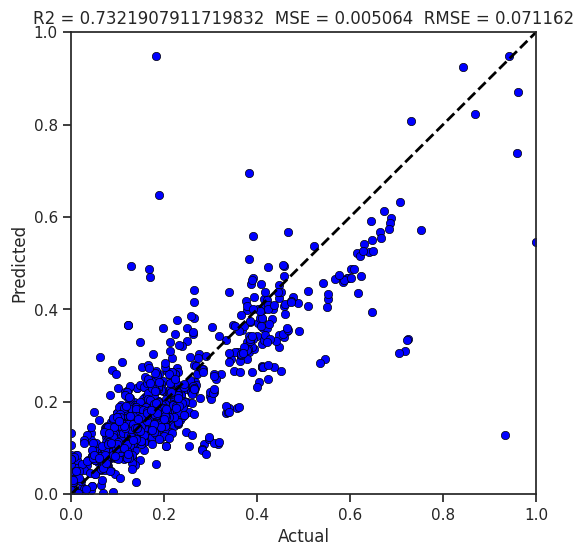

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.axis([0, 1, 0, 1])           #Choose the approp. length (was 160)
plt.scatter(x=yp_valid, y=y_pred_poly_LR_PCA, 
            color="blue", edgecolors="#000000", linewidths=0.5)

plt.plot([0, 200],[0, 200], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted') # Predicted values on y axis
plt.xlabel('Actual') 
plt.title('R2 = %s  MSE = %f  RMSE = %f'%(r2, mse, rmse))

## Results and Conclusion

In [ ]:
new_data = pd.read_csv("new_data.csv")
new_data.head()

,GasVol,WaterVol,AVG_DOWNHOLE_PRESSURE,AVG_ANNULUS_PRESS,AVG_WHP_P
0,110078.0,0.0,223.603,20.8530,67.256
1,117388.0,0.0,220.102,19.3612,65.407
2,109517.0,0.0,220.490,25.1426,65.314
3,109362.0,0.0,220.154,25.1426,64.916
4,104993.0,0.0,220.066,28.6000,64.691


In [ ]:
x_pred1 = new_data[['AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P', 'WaterVol']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_pred = MinMaxScaler()
x_pred = scaler_pred.fit_transform(x_pred1)

In [ ]:
y_lr = LR_best.predict(x_pred)
y_rf = grid.predict(x_pred)
y_xgb = xgb_reg.predict(x_pred)
y_poly = grid_search_P.predict(x_pred)
y_LSTM = random_search.predict(x_pred)

In [ ]:
y_rf_reshaped = y_rf.reshape(-1, 1)
y_xgb_reshaped = y_xgb.reshape(-1, 1)
y_LSTM_reshaped = y_LSTM.reshape(-1, 1)

y_rf1 = scaler.inverse_transform(y_rf_reshaped)
y_xgb1 = scaler.inverse_transform(y_xgb_reshaped)
y_LSTM1 = scaler.inverse_transform(y_LSTM_reshaped)

In [ ]:
y_lr1 = scaler.inverse_transform(y_lr)
y_rf1 = scaler.inverse_transform(y_rf_reshaped)
y_xgb1 = scaler.inverse_transform(y_xgb_reshaped)
y_poly1 = scaler.inverse_transform(y_poly)
y_LSTM1 = scaler.inverse_transform(y_LSTM_reshaped)

In [ ]:
y_lr2 = pd.DataFrame(y_lr1, columns=["GasVol"])
y_lr2.head()

,GasVol
0,-34412.025517
1,-36287.695032
2,-24609.730658
3,-24294.683596
4,-17210.494931


In [ ]:
y_rf2 = pd.DataFrame(y_rf1, columns=["GasVol"])
y_rf2.head()

,GasVol
0,56572.866128
1,51672.445656
2,107426.746867
3,107426.746867
4,54462.961467


In [ ]:
y_xgb2 = pd.DataFrame(y_xgb1, columns=["GasVol"])
y_xgb2.head()

,GasVol
0,71529.351562
1,73191.570312
2,83188.460938
3,83188.460938
4,64990.609375


In [ ]:
y_poly2 = pd.DataFrame(y_poly1, columns=["GasVol"])
y_poly2.head()

,GasVol
0,361204.270356
1,319776.895792
2,408682.239429
3,398283.627379
4,520701.814269


In [ ]:
y_LSTM2 = pd.DataFrame(y_LSTM1, columns=["GasVol"])
y_LSTM2.head()

,GasVol
0,69627.312500
1,65851.179688
2,76024.296875
3,75798.054688
4,62884.492188


In [ ]:
d1 = data.join(y_lr2, rsuffix='_lr')


In [ ]:
y_rf2 = pd.DataFrame(y_rf1, columns=["GasVol"]).add_suffix("_rf")
d2 = d1.join(y_rf2)

y_xgb2 = pd.DataFrame(y_xgb1, columns=["GasVol"]).add_suffix("_xgb")
d3 = d2.join(y_xgb2)

y_poly2 = pd.DataFrame(y_poly1, columns=["GasVol"]).add_suffix("_poly")
d4 = d3.join(y_poly2)

y_LSTM2 = pd.DataFrame(y_LSTM1, columns=["GasVol"]).add_suffix("_LSTM")
data_pred = d4.join(y_LSTM2)


In [ ]:
data_pred.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,Choke,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,GasVol,WaterVol,GasVol_lr,GasVol_rf,GasVol_xgb,GasVol_poly,GasVol_LSTM
40,223.603,107.778,20.8530,47.08721,67.256,53.921,38.840,110078.0,0.0,-27979.948930,51875.955159,74076.429688,208157.124513,67607.640625
41,220.102,107.889,19.3612,47.76981,65.407,53.832,36.990,117388.0,0.0,-41195.658511,63304.624840,68547.523438,375720.969915,55568.742188
42,220.490,107.860,25.1426,47.13595,65.314,55.754,36.906,109517.0,0.0,-32986.607713,57751.346920,64711.566406,230217.689512,55630.335938
43,220.154,107.859,25.1426,47.14247,64.916,55.628,36.509,109362.0,0.0,-25841.383785,50569.961359,69325.257812,130525.435109,58325.660156
44,220.066,107.851,28.6000,46.52459,64.691,52.236,36.281,104993.0,0.0,-19664.483529,49817.498582,62502.699219,112998.163554,69200.625000


## Feature Importance

In [ ]:
importances = list(RF_best.feature_importances_)

In [ ]:
InputData = input[['WaterVol', 'AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P']]
Output = input[['GasVol']]

In [ ]:
Input_Features = InputData[['WaterVol', 'AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P']]
Output_Feature = Output

In [ ]:
feature_list=list(Input_Features[['WaterVol', 'AVG_DOWNHOLE_PRESSURE', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P']])
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:8} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AVG_WHP_P Importance: 0.42
Variable: WaterVol Importance: 0.32
Variable: AVG_DOWNHOLE_PRESSURE Importance: 0.21
Variable: AVG_ANNULUS_PRESS Importance: 0.05


<Axes: xlabel='Importance', ylabel='Input_Features'>

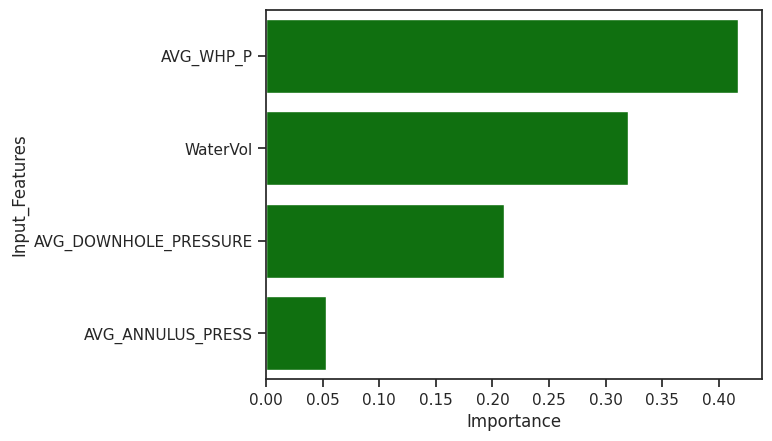

In [ ]:
feature_dataframe = pd.DataFrame(data = feature_list, columns = ['Input_Features'])

feature_dataframe['Importance'] = importances
feature_dataframe.sort_values('Importance',inplace=True)
feature_dataframe = feature_dataframe.nlargest(4, 'Importance') # Plotting the 4 most important features
sns.set(style = 'ticks')
sns.barplot(x = 'Importance', y = 'Input_Features', data = feature_dataframe, color="green")

* In conclusion, I explored several algorithms in predicting gas production from production data. 
* I explored time series forecasting - LSTM and optimzation was done on the model.
* I also compared the time series with other techniques such as Linear regression, Random Forest, XGBoost, and polynomial regression.
* Linear regression had the worst performance, hence optimization was not done for this model.
* RF and XGBoost showed better performance compared to the other algorithms.
* PCA was also explored but it did not have any effect on the models.
* XGBoost performed better than all other algorithms.
* Wellhead pressure and water volume were the features with the most important features in this work.